# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [17]:
import pandas            as pd
import numpy             as np
import missingno         as msno

import matplotlib.pyplot as plt


In [5]:
pwd

'/home/ehgeraldo/repos/Well_Logs_Plots'

In [6]:
ls -l

total 8624
-rw-rw-r-- 1 ehgeraldo ehgeraldo  479237 ago 29 22:33 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95981 ago 29 22:34 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  398435 ago 29 22:37 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395869 ago 29 22:43 c3.3-ehgeraldo_matplotlib_subplots.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplotlib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201758 ago 29 17:10 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  247083 ago 29 22:30 c6.6-ehgeraldo_matplotlib_subplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  803860 ago 30 16:10 c7.7-ehgeraldo_well_locations.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  217375 set  1 09:21 c8.8-ehgeraldo_well_boxplots.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  217347 set  2 20:26 c9.9-ehgeraldo_well_missing_data.ipynb
drwxrwxr-x 2 ehgeraldo ehgeraldo    4096 set  2 20:26 data/


In [8]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Well_Logs_Plots/data/xeek_subset2.csv')

## Data dimensions

In [9]:
print('Number of rows: {}'.format(df_raw.shape[0]))
print('Number of cols: {}'.format(df_raw.shape[1]))

Number of rows: 133198
Number of cols: 25


## Data types

In [10]:
df_raw.dtypes

WELL            object
DEPTH_MD       float64
X_LOC          float64
Y_LOC          float64
Z_LOC          float64
GROUP           object
FORMATION       object
CALI           float64
RSHA           float64
RMED           float64
RDEP           float64
RHOB           float64
GR             float64
SGR            float64
NPHI           float64
PEF            float64
DTC            float64
SP             float64
DTS            float64
DCAL           float64
DRHO           float64
ROPA           float64
RXO            float64
LITHOFACIES      int64
LITH_CONF      float64
dtype: object

## Check NAs 

In [11]:
df_raw.isna().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
SGR            115848
NPHI            41473
PEF             32358
DTC               563
SP              39518
DTS            121014
DCAL            76998
DRHO            27659
ROPA           119725
RXO             94252
LITHOFACIES         0
LITH_CONF          15
dtype: int64

In [8]:
#df_raw.dropna(inplace=True)

In [12]:
#df_raw.sample().T

## Data Describe

In [13]:
df_raw.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,PEF,DTC,SP,DTS,DCAL,DRHO,ROPA,RXO,LITHOFACIES,LITH_CONF
count,133198.000000,125805.000000,1.258050e+05,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,...,100840.000000,132635.000000,93680.000000,12184.000000,56200.000000,105539.000000,13473.000000,38946.000000,133198.000000,133183.000000
mean,1792.944663,451235.640861,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,...,4.511845,122.700286,91.608922,176.583712,0.972165,0.009307,25.253839,-112.944168,63261.582892,1.235796
std,739.441515,15299.395264,3.094449e+04,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,...,5.092807,34.234879,98.781404,44.358622,43.000304,0.067312,14.319902,333.547482,13623.352961,0.480781
min,415.261599,436790.843800,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,...,1.010027,7.415132,-2.199269,93.068260,-12.215459,-1.795894,0.556113,-999.900024,30000.000000,1.000000
25%,1182.822400,437640.781300,6.453743e+06,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,...,2.857540,87.899776,48.808243,149.754013,0.007800,-0.007736,14.260232,0.537328,65000.000000,1.000000
50%,1747.524496,444152.093800,6.463019e+06,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,...,3.780121,135.968094,70.282761,162.537949,0.415419,0.003215,24.598738,0.879455,65000.000000,1.000000
75%,2413.874901,460442.093800,6.478963e+06,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,...,5.098502,147.388626,92.173889,190.082294,1.118416,0.022928,33.749100,1.519061,65030.000000,1.000000
max,3272.024000,476770.156300,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,...,365.575592,230.432953,526.547302,377.327789,10006.789060,0.433157,86.378632,2000.000000,99000.000000,3.000000


## Descriptive Statistical

In [14]:
num_attributes = df_raw.select_dtypes('float64')

In [15]:
num_attributes.sample(2)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,NPHI,PEF,DTC,SP,DTS,DCAL,DRHO,ROPA,RXO,LITH_CONF
26537,1741.840,436812.0313,6462996.0,-1716.756836,15.975877,0.773976,0.773976,0.766566,2.018696,52.092594,...,0.502810,2.704002,148.156982,69.570465,NaN,3.725876,0.085146,NaN,0.413648,1.0
4712,1210.752,437640.8125,6470976.5,-1185.699951,15.841737,NaN,0.977854,1.120605,1.747347,55.652431,...,0.529613,2.374283,149.838333,49.811161,NaN,NaN,-0.001998,NaN,NaN,1.0


## Numerical Attributes

In [18]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [19]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,DEPTH_MD,4.152616e+02,3.272024e+03,2856.762401,1.792945e+03,1747.524496,739.438740,0.093931,-1.105894
1,X_LOC,4.367908e+05,4.767702e+05,39979.312500,4.512356e+05,NaN,15299.334458,0.638058,-1.230148
2,Y_LOC,6.429286e+06,6.539631e+06,110344.500000,6.471392e+06,NaN,30944.363932,0.708930,-0.541641
3,Z_LOC,-3.246156e+03,-3.752515e+02,2870.904755,-1.719215e+03,NaN,740.533735,-0.221370,-1.048622
4,CALI,5.946157e+00,2.571740e+01,19.771239,1.319940e+01,NaN,3.561372,0.495462,-0.137184
5,RSHA,1.301926e-01,2.193905e+03,2193.774348,1.056183e+01,NaN,116.359045,14.561793,223.720361
6,RMED,-8.418695e-03,1.796209e+03,1796.217525,1.708851e+00,NaN,9.127164,119.825374,18574.889367
7,RDEP,1.230677e-01,1.856935e+03,1856.811991,1.743774e+00,NaN,13.233277,104.044125,12601.611440
8,RHOB,1.366913e+00,3.115611e+00,1.748698,2.199556e+00,NaN,0.236900,-0.120073,0.030612
9,GR,1.092843e-01,8.042990e+02,804.189666,6.955387e+01,66.266132,39.328581,1.346259,11.784259


## Data missing Plotting

In [20]:
df_raw.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'DTS', 'DCAL', 'DRHO', 'ROPA', 'RXO', 'LITHOFACIES',
       'LITH_CONF'],
      dtype='object')

<AxesSubplot:>

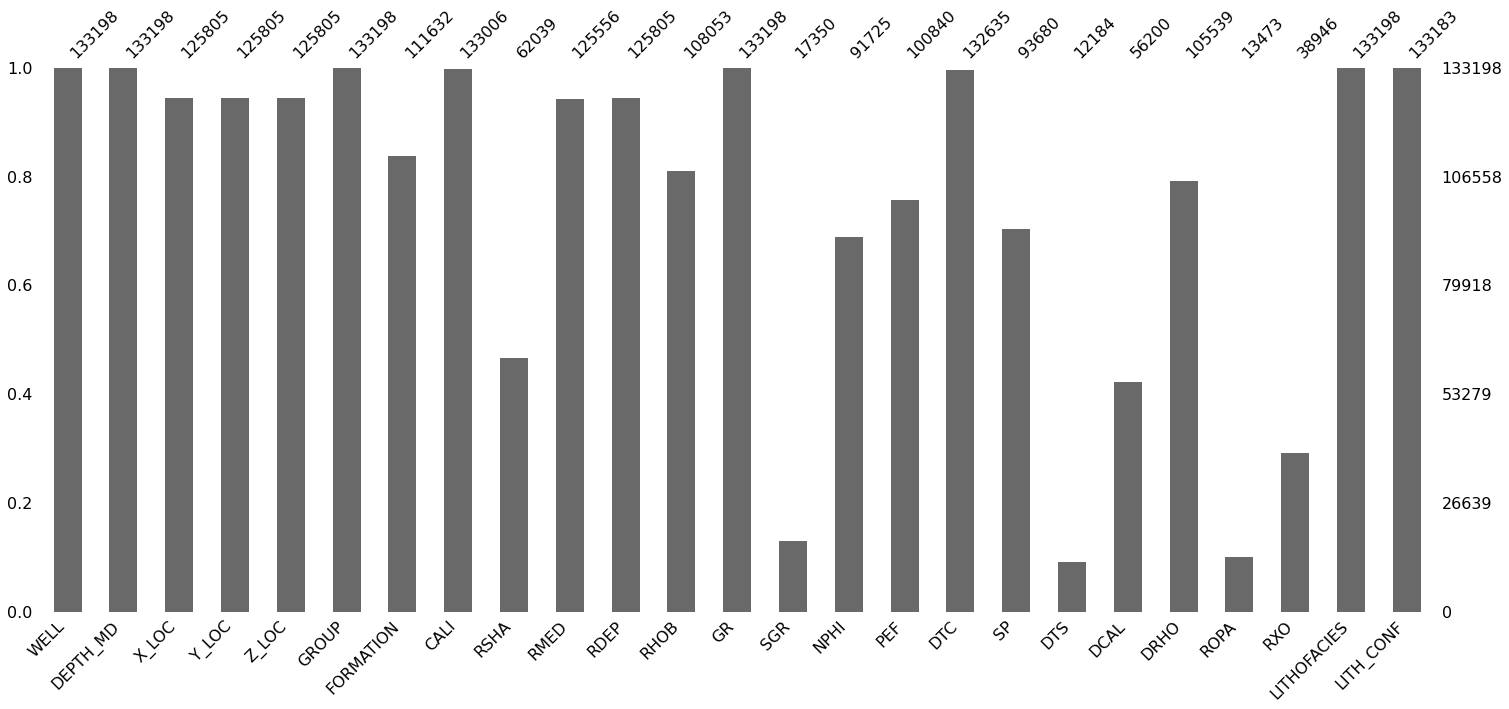

In [26]:
# bar chart

msno.bar(df_raw)

<AxesSubplot:>

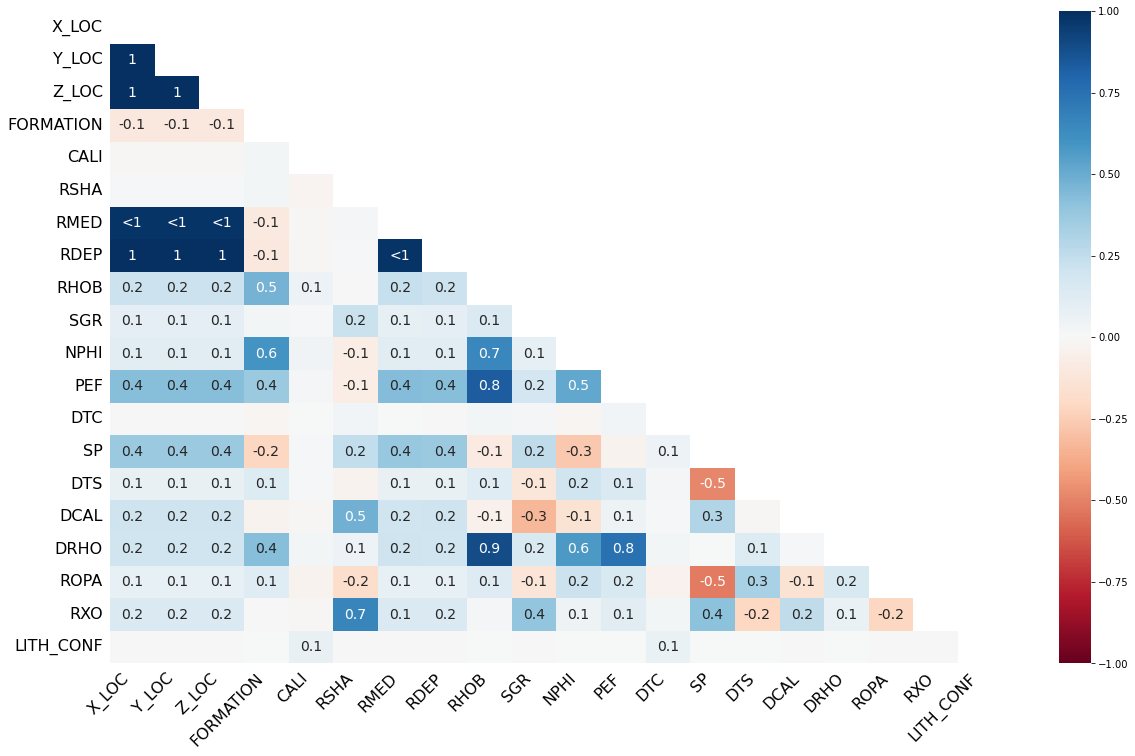

In [27]:
# Heat map

msno.heatmap(df_raw)

<AxesSubplot:>

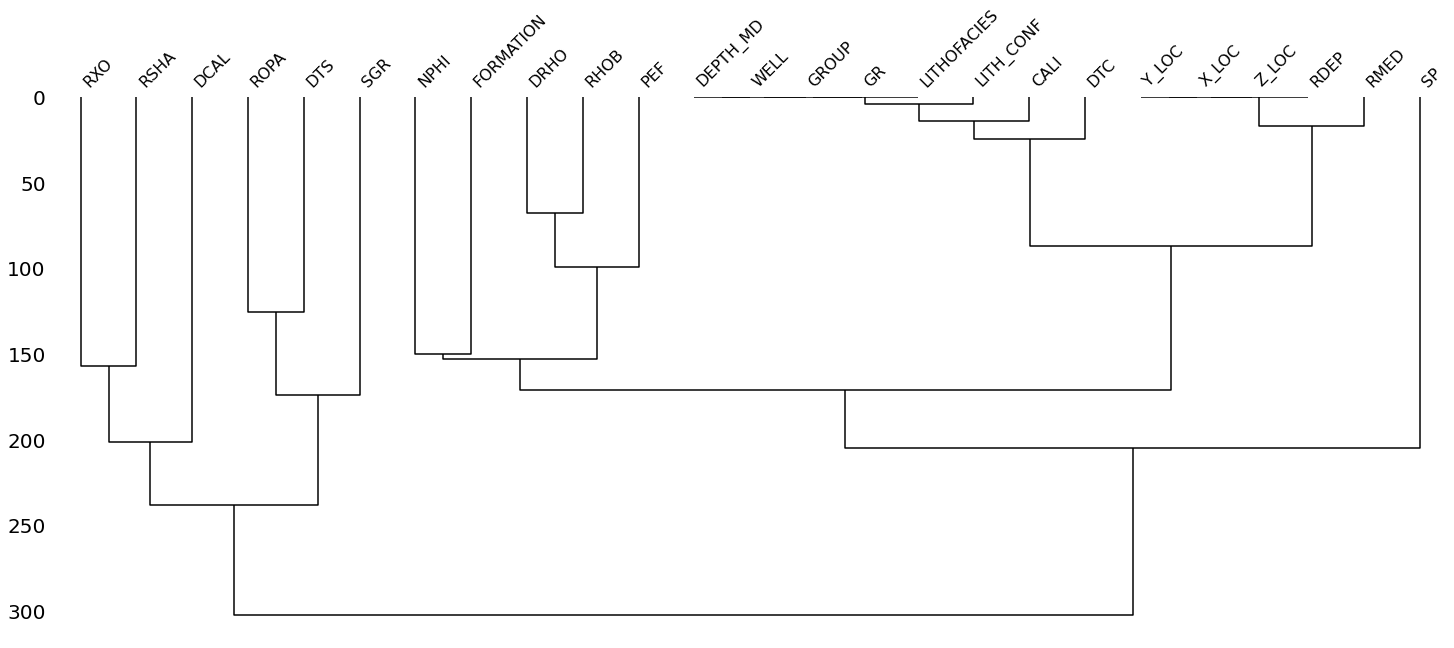

In [28]:
# Dendograms

msno.dendrogram(df_raw)